<a href="https://www.kaggle.com/code/tornikeonoprishvili/fdtd-simulation?scriptVersionId=92487899" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from numpy import sqrt


Some sim params:

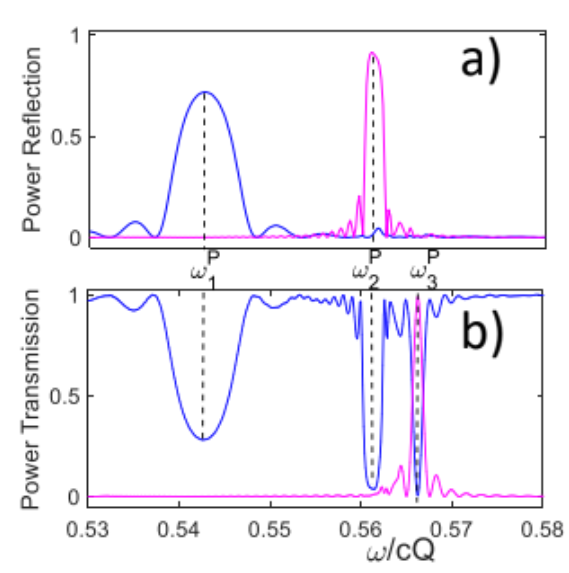

First off, set $h = 10 nm$. Next, the $\frac{\omega}{cQ} = \frac{h}{\lambda}$ 

Now we have to select what the $\frac{h}{\lambda}$ is. This determines  and $\hat{\epsilon}$ and, $\lambda$ obviously.

So, let's set $\frac{h}{\lambda} = 0.53$ (No pass 

$\hat{\epsilon} = 1 - \frac{2q^2}{\omega^2m\epsilon_0} = 1 - 0.01 (\frac{h}{\lambda})^{-2}$  


So: 
1. h/l at .53, pass
2. h/l at .5425 block
3. h/l at .58 pass 

In [8]:
ratio = 0.53
h = 10e-9
lamd = h / ratio
k_0 = 1 - 0.01 * (h/lamd) ** -2 # Used for eps hat calculation

In [9]:

eps0 = 8.85418782e-12
miu0 = 4*pi*1e-7
c0 = 1/sqrt(miu0*eps0)

In [10]:
# NBUFF   = [5, 5, 5, 5];
# NLAM    = 25;
# NDIM    = 3;

# NCELL   = [18 18];
# CELLS   = [6 10];

In [11]:
!pip install fdtd

     |████████████████████████████████| 44 kB 1.2 MB/s             


In [12]:
import fdtd

In [18]:
fdtd.set_backend("numpy")

```python
fdtd.Grid(
    shape,
    grid_spacing: float = 155e-9,
    permittivity: float = 1.0,
    permeability: float = 1.0,
    courant_number: float = None,
)
```

<AxesSubplot:>

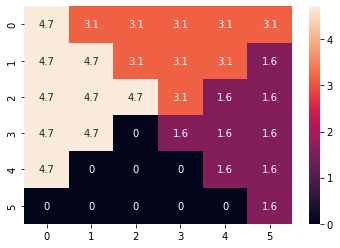

In [20]:
vortex = [
    ['v'] + ['<'] * 5,
    ['v'] * 2 + ['<'] * 3 + ['^'],
    ['v'] * 3 + ['<'] + ['^'] * 2,
    ['v'] * 2 + ['>'] + ['^'] + ['^'] * 2,
    ['v'] * 1 + ['>'] * 3 + ['^'] * 2,
    ['>'] * 5 + ['^'],
]

vortex = np.array(vortex)
rads = [3*pi/2,0,pi/2,pi]
for a,b in zip(list('v>^<'),rads):
    vortex = np.where(vortex == a,b,vortex)
vortex = vortex.astype('float32')
sns.heatmap(vortex,annot=True)

<AxesSubplot:>

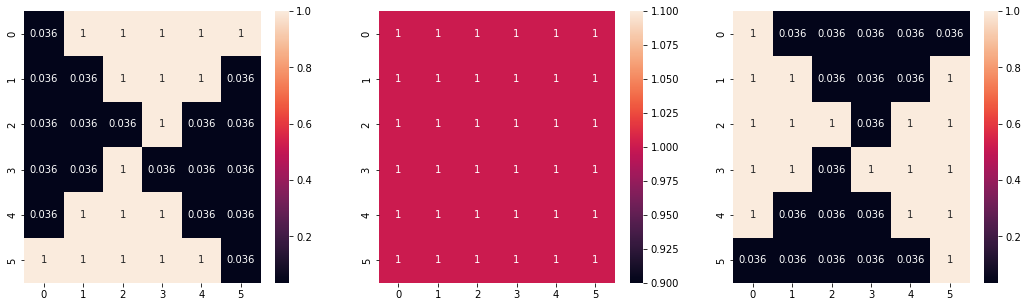

In [30]:
def eps_fun(phi):
    eps_1 = 1 - k_0 * np.sin(phi)**2
    eps_2 = k_0 * np.sin(phi) * np.cos(phi)
    eps_3 = 1 - k_0 * np.cos(phi)**2
    eps = np.stack([eps_1,eps_2,eps_3],2)
    eps = eps.astype('float32')
    return eps


vortex_eps = eps_fun(vortex)
f,ax = plt.subplots(1,3,figsize=(18,5))
sns.heatmap(vortex_eps[...,0],annot=True,ax=ax[0])
# This should be zero and not be used for calculation
# Substitue this with one
vortex_eps[...,1] = 1.0
sns.heatmap(vortex_eps[...,1],annot=True,ax=ax[1])
sns.heatmap(vortex_eps[...,2],annot=True,ax=ax[2])

In [31]:
air_eps = np.ones((6,6),'float32')

In [32]:
grid_plan = np.array([
    ['a'] * 6,
    *[['x'] * 6, 
      ['a'] * 6] * 10,
])
grid_plan

array([['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a'],
       ['x', 'x', 'x', 'x', 'x', 'x'],
       ['a', 'a', 'a', 'a', 'a', 'a']], dtype='<U1')

In [33]:
pml_width = np.array([10,10])
Px,Py = np.array(grid_plan.shape) * 6 + pml_width * 2
grid = np.ones((Px,Py))
grid.shape

(146, 56)

1.0

In [ ]:
grid_plan_2 = grid_plan.repeat(6,0).repeat(6,1)
grid_plan_2 = grid_plan_2[...,None].repeat(3,2)

In [ ]:
np.where(grid_plan == 'a',air_eps,vortex_eps)

In [ ]:
# grid = fdtd.Grid(
#     shape = (25e-6, 15e-6, 1), # 25um x 15um x 1 (grid_spacing) --> 2D FDTD
# )


grid = fdtd.Grid(
    shape = (170,56,1),
    grid_spacing=4 * nm,
)

In [ ]:
# x boundaries
# grid[0, :, :] = fdtd.PeriodicBoundary(name="xbounds")
grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# y boundaries
# grid[:, 0, :] = fdtd.PeriodicBoundary(name="ybounds")
grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [ ]:
grid

```python
fdtd.LineSource(
    period: Number = 15, # timesteps or seconds
    amplitude: float = 1.0,
    phase_shift: float = 0.0,
    name: str = None,
)
```

In [ ]:
grid.visualize(z=0)

In [ ]:
grid[25, :, 0] = fdtd.LineSource(
    period = 1550e-9 / (3e8), name="source"
)

```python
fdtd.PML(
    a: float = 1e-8, # stability factor
    name: str = None
)
```

In [ ]:
grid

In [ ]:
grid

In [ ]:
grid[13e-6:18e-6, 5e-6:8e-6, 0] = fdtd.Object(permittivity=1.5**2)

In [ ]:
grid[11:32, 30:84, 0] = fdtd.Object(permittivity=1.7**2, name="object")

In [ ]:
print(grid)

In [ ]:
1.55e-7 * 75

In [ ]:
grid[12e-6, :, 0] = fdtd.LineDetector(name="detector")

In [ ]:
grid.reset()
grid.run(total_time=100)

```python
grid.visualize(
    grid,
    x=None,
    y=None,
    z=None,
    cmap="Blues",
    pbcolor="C3",
    pmlcolor=(0, 0, 0, 0.1),
    objcolor=(1, 0, 0, 0.1),
    srccolor="C0",
    detcolor="C2",
    show=True,
)
```

In [ ]:
import matplotlib.pyplot as plt
grid.visualize(z=0, show=True)